<a href="https://colab.research.google.com/github/chayvw18/Deep-Learning-PyTorch/blob/main/DL_CLass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Deep-Learning/ANN/DL_CLass.ipynb

[Errno 20] Not a directory: '/content/drive/MyDrive/Deep-Learning/ANN/DL_CLass.ipynb'
/content


In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#new
import torch.nn.functional as F

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-bbfe7bd9a460>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


```
class the Class4ANN(nn.Module):
  def __init__(self):
  super().__init__()

  #define layers
    self.input = nn.Linear(2,1)
    self.output = nn.Linear(1,1)

  # forward pass
  def forward(self, x):

  #input layer
    x = F.relu(self.input(x))

  #out put layer
    return torch.sigmoid(self.output(x)
```
Class function - Analogies
<br>

def __init__() - objects, nouns, layers, characters in the story

<br>

def forward - Actions, verbs, operations, plot
<br>
Two main functions in a nn.Module class

<br>

**nn.Sequential** - simple, easy to set up and read , limited flexibility and interactivity
<br>

**class(nn.Module)** - simple or complicated, usally takes some time, *the sky's the limit*

In [3]:
#create data

nPerClust = 100
blur = 1 #how spread out the data are

A = [1, 1]
B = [5, 1]

#generate the data
a = [A[0] + np.random.randn(nPerClust) * blur, A[1]  + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]


#true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust, 1))))

#concatanate into a matrix
# data_np = np.stack((a,b)).T
data_np = np.hstack((a,b)).T

#convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [ ]:
#build the model
# ANNclassify = nn.Sequential(
#     nn.Linear(2,1), #binary taking in two inputs
#     nn.ReLU(), #activation function
#     nn.Linear(1,1),
#     nn.Sigmoid() #final activation unit
# )
# ANNclassify

In [10]:
class  Class4ANN(nn.Module):
  def __init__(self):
    super().__init__()

  #define layers
    self.input = nn.Linear(2,1)
    self.output = nn.Linear(1,1)

  # forward pass
  def forward(self, x):
    x = self.input(x)

  #input layer
    x = F.relu(x) #multiply ways to apply relu


    #output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x




  #out put layer
    # return torch.sigmoid(self.output(x)

## create an instance of the class
ANNclassify = Class4ANN() #Class4ANN model template

In [11]:
#other model features
learningRate = .01

#loss function
lossFunction = nn.BCELoss()

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [12]:
#train the model
numephocs = 1000

losses = torch.zeros(numephocs)

#train the model
for ephi in range(numephocs):

  #forward pass
  yhat = ANNclassify(data)

  #compute loss
  loss = lossFunction(yhat, labels)
  losses[ephi] = loss

  # backdprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

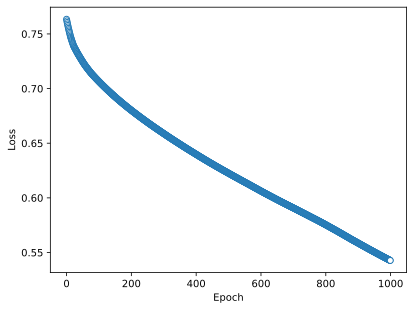

In [13]:
#show losses

# plt.plot(losses.deatch(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
#compute the predictions

#manually compute losses
#final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

#find the errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final Accuracy: %g%%' %totalacc)

Final Accuracy: 80%
